In [1]:
!pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Archita Shrivastava\\anaconda3\\Lib\\site-packages\\~-%py\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
!pip uninstall -y numpy tensorflow


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [3]:
!pip install tensorflow==2.12.0 numpy==1.23.5


  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
tensorflow-text 2.10.0 requires tensorflow<2.11,>=2.10.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.12.0 which is incompatible.
imbalanced-learn 0.14.0 requires numpy<3,>=1.25.2, but you have numpy 1.23.5 which is incompatible.


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[0]

'airplane'

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[index])
    

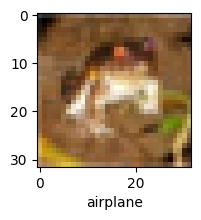

In [13]:
plot_sample(X_train, y_train, 0)

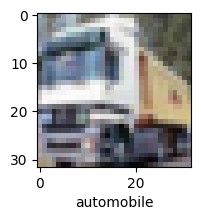

In [14]:
plot_sample(X_train, y_train, 1)

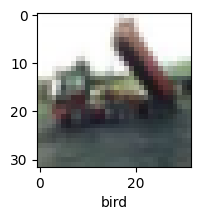

In [15]:
plot_sample(X_train, y_train, 2)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape =(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 151s 95ms/step - loss: 1.8127 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6243 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5430 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4832 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4317 - accuracy: 0.4936


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report ", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification report                precision    recall  f1-score   support

           0       0.52      0.56      0.54      1000
           1       0.61      0.65      0.63      1000
           2       0.41      0.33      0.37      1000
           3       0.39      0.24      0.30      1000
           4       0.51      0.29      0.37      1000
           5       0.42      0.34      0.38      1000
           6       0.58      0.47      0.52      1000
           7       0.34      0.78      0.47      1000
           8       0.54      0.69      0.61      1000
           9       0.65      0.46      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [21]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [22]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4708 - accuracy: 0.4713
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1239 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9909 - accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9082 - accuracy: 0.6837
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8437 - accuracy: 0.7067
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7846 - accuracy: 0.7286
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7348 - accuracy: 0.7454
Epoch 8/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6900 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6522 - accuracy: 0.7728
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [25]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9610 - accuracy: 0.6861


[0.9609800577163696, 0.6861000061035156]

In [26]:
y_test  = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

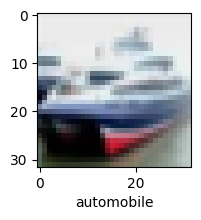

In [27]:
plot_sample(X_test, y_test, 1)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[8.50008987e-03, 1.69957530e-05, 3.16900504e-03, 9.60607767e-01,
        2.47034885e-04, 1.66730434e-02, 4.95365821e-03, 4.30675682e-05,
        5.57149202e-03, 2.17852896e-04],
       [1.00585613e-02, 6.13621250e-02, 1.62756023e-05, 1.61029930e-05,
        2.19216008e-06, 3.74883982e-08, 4.92516165e-07, 6.22466359e-07,
        9.27793443e-01, 7.50184699e-04],
       [1.55811012e-01, 8.64438489e-02, 1.00146281e-02, 6.27466058e-03,
        2.28462461e-03, 5.94428566e-04, 1.12752226e-04, 2.45467946e-03,
        7.24622369e-01, 1.13869691e-02],
       [7.79852331e-01, 2.18151230e-02, 7.55894259e-02, 1.75489360e-04,
        8.29815958e-03, 4.69406405e-06, 1.02713188e-04, 8.09119665e-05,
        1.14009425e-01, 7.17364892e-05],
       [1.93148708e-07, 1.94222571e-06, 1.05805951e-03, 4.51200269e-03,
        1.46389361e-02, 1.29648513e-04, 9.79657233e-01, 7.92090191e-07,
        8.19714003e-08, 1.11141355e-06]], dtype=float32)

In [31]:
np.argmax(y_pred[0])

3

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

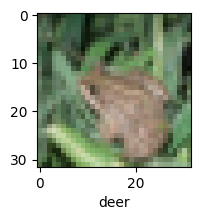

In [38]:
plot_sample(X_test, y_test, 4)

In [36]:
classes[y_classes[1]]

'ship'

In [40]:
print("Classification Repot", classification_report(y_test, y_classes))


Classification Repot               precision    recall  f1-score   support

           0       0.64      0.81      0.72      1000
           1       0.83      0.81      0.82      1000
           2       0.50      0.67      0.57      1000
           3       0.49      0.51      0.50      1000
           4       0.61      0.66      0.64      1000
           5       0.70      0.45      0.55      1000
           6       0.76      0.77      0.77      1000
           7       0.81      0.68      0.74      1000
           8       0.78      0.80      0.79      1000
           9       0.88      0.69      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

